### Постановка задачи:
Промоделировать стационарное распредеелние температуры в зависимости от источника тепла
$$\begin{cases}
    -u'' + 9u = 20e^{-(x-1.6)^2}; \quad x \in (0, 3), \\
    u(0) = 2, \\
    u(3) = 10   
\end{cases}.$$

### Необохдимый теоретический материал:

### Решение задачи:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
optns = {"W" : 20, "c" : 1.6}
conds = {"u_a" : 2, "u_b" : 10}
dist = {"a" : 0, "b" : 3}
q = 9

Аналитическое решение при $f(x) = 0$ имеет вид:
$$u(x) = \frac{10 - 2e^{-9}}{e^9 - e^{-9}} \cdot e^{3x} + \frac{2e^{9} - 10}{e^9 - e^{-9}} \cdot e^{-3x}.$$

In [3]:
def solve(x):
    c1 = (10 - 2 * np.exp(-9)) / (np.exp(9) - np.exp(-9))
    c2 =  (2 * np.exp(9) - 10) / (np.exp(9) - np.exp(-9))
    return c1 * np.exp(3 * x) + c2 * np.exp(-3 * x)

Построим разностную схему:
    $$\begin{cases}
        u_0 = u_a, \\
        -\frac{1}{h^2}u_0 + (\frac{2}{h^2} + q)u_1 -\frac{1}{h^2}u_2 = 20e^{-(x_1-1.6)^2}, \\
        -\frac{1}{h^2}u_1 + (\frac{2}{h^2} + q)u_2 -\frac{1}{h^2}u_3 = 20e^{-(x_2-1.6)^2}, \\
        ... \\
        u_N = u_b
    \end{cases}.$$

In [4]:
def build_A(q, dist, n):
    h = (dist["b"] - dist["a"]) / (n - 1)
    A = np.zeros([n, n])

    A[0, 0] = 1
    A[n - 1, n - 1] = 1
    for i in range(1, n - 1):
        A[i, i - 1] = -1.0 / h**2
        A[i, i] = 2.0 / h**2 + q
        A[i, i + 1] = -1.0 / h**2
    return A

def build_b(optns, dist, conds, n):
    h = (dist["b"] - dist["a"]) / (n - 1)
    b = np.zeros(n)

    b[0] = conds["u_a"]
    b[n - 1] = conds["u_b"]
    for i in range(1, n - 1):
        b[i] = optns["W"] * np.exp(-(dist["a"] + i * h - optns["c"])**2)
    return b

1. Найдем приближенное решение задачи при шаге $h = \frac{b - a}{100}$  (по 101 точке)

In [5]:
n = 101
x = np.linspace(dist["a"], dist["b"], n, endpoint = True)

A = build_A(q, dist, n)
b = build_b(optns, dist, conds, n)
u_init = np.linalg.solve(A, b)

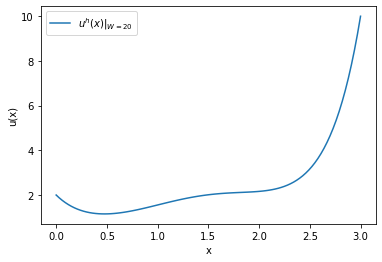

In [6]:
plt.plot(x, u_init, label = "$u^{h}(x)|_{W = 20}$")
plt.ylabel("u(x)")
plt.xlabel("x")

plt.legend()
plt.show()

2. При $W = 64$ значение температуры в точке $c$ увеличиться прибилизтельно в 3 раза.

   Найдем приближенное решение задачи при данной $W$:

In [7]:
optns["W"] = 64
b = build_b(optns, dist, conds, n)
u_new = np.linalg.solve(A, b)

3. Построим 3 графика распределения температуры: $f(x) = 0, \quad f(x) = 20e^{-(x-1.6)^2}, \quad f(x) = 64e^{-(x-1.6)^2}$

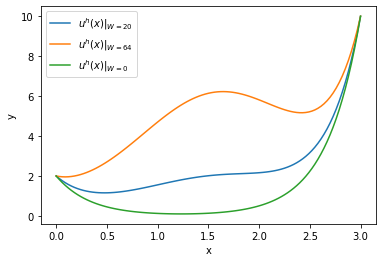

In [12]:
plt.plot(x, u_init, label = '$u^{h}(x)|_{W = 20}$')
plt.plot(x, u_new, label = '$u^{h}(x)|_{W = 64}$')
plt.plot(x, solve(x), label = '$u^{h}(x)|_{W = 0}$')
plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

4. Для каждого решения найдем тепловую энергию стержня как значение $$E = \int_{a}^{b} y^2(x)dx$$

   Будем считать значение энергии стержня по формуле левых прямоугольников

In [9]:
def get_energy(y, h):
    I = 0
    for i in range(0, y.size - 1):
        I += y[i]**2
    return h * I

In [21]:
h = x[1] - x[0]
I_homogen = get_energy(solve(x), h)
print("При однородной правой части f(x) = 0: {:.3f}".format(I_homogen))
I_init = get_energy(u_init, h)
print("При мощности источника энергии W = 20: {:.3f}".format(I_init))
I_new = get_energy(u_new, h)
print("При мощности источника энергии W = 64: {:.3f}".format(I_new))

При однородной правой части f(x) = 0: 15.953
При мощности источника энергии W = 20: 25.369
При мощности источника энергии W = 64: 80.196
